# Aiida

## Define workflow with aiida

In [1]:
from python_workflow_definition.aiida import write_workflow_json

from aiida_workgraph import WorkGraph, task
from aiida import orm, load_profile
load_profile()

workflow_json_filename =  "aiida_simple.json"

In [2]:
from simple_workflow import (
    add_x_and_y as _add_x_and_y,
    get_prod_and_div as _get_prod_and_div,
)

In [4]:
wg = WorkGraph("wg-simple")

In [5]:
get_prod_and_div_task = wg.add_task(
    task(outputs=['prod', 'div'])(_get_prod_and_div),
    name="get_prod_and_div",
    x=orm.Float(1),
    y=orm.Float(2),
)

In [6]:
add_x_and_y_task = wg.add_task(
    _add_x_and_y,
    name="add_x_and_y",
    x=get_prod_and_div_task.outputs.prod,
    y=get_prod_and_div_task.outputs.div,
)

In [7]:
write_workflow_json(wg=wg, file_name=workflow_json_filename)

{'nodes': {'0': 'simple_workflow.add_x_and_y',
  '1': 'simple_workflow.add_x_and_y_and_z',
  '2': 1,
  '3': 2},
 'edges': [{'tn': 1, 'th': 'x', 'sn': 0, 'sh': 'x'},
  {'tn': 1, 'th': 'y', 'sn': 0, 'sh': 'y'},
  {'tn': 1, 'th': 'z', 'sn': 0, 'sh': 'z'},
  {'tn': 0, 'th': 'x', 'sn': 2, 'sh': None},
  {'tn': 0, 'th': 'y', 'sn': 3, 'sh': None}]}

In [8]:
!cat {workflow_json_filename}

{
  "nodes": {
    "0": "simple_workflow.add_x_and_y",
    "1": "simple_workflow.add_x_and_y_and_z",
    "2": 1,
    "3": 2
  },
  "edges": [
    {
      "tn": 1,
      "th": "x",
      "sn": 0,
      "sh": "x"
    },
    {
      "tn": 1,
      "th": "y",
      "sn": 0,
      "sh": "y"
    },
    {
      "tn": 1,
      "th": "z",
      "sn": 0,
      "sh": "z"
    },
    {
      "tn": 0,
      "th": "x",
      "sn": 2,
      "sh": null
    },
    {
      "tn": 0,
      "th": "y",
      "sn": 3,
      "sh": null
    }
  ]
}

## Load Workflow with jobflow

In [9]:
from python_workflow_definition.jobflow import load_workflow_json

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [10]:
from jobflow.managers.local import run_locally

In [11]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [12]:
result = run_locally(flow)
result

2025-04-02 14:36:37,425 INFO Started executing jobs locally
2025-04-02 14:36:37,751 INFO Starting job - add_x_and_y (4bcb90c8-2c19-4981-a88e-56d5d24b5df9)
2025-04-02 14:36:37,754 INFO Finished job - add_x_and_y (4bcb90c8-2c19-4981-a88e-56d5d24b5df9)
2025-04-02 14:36:37,755 INFO Starting job - add_x_and_y_and_z (88bc90e5-09a0-443d-b24e-673cc6bc0819)
2025-04-02 14:36:37,756 INFO Finished job - add_x_and_y_and_z (88bc90e5-09a0-443d-b24e-673cc6bc0819)
2025-04-02 14:36:37,756 INFO Finished executing jobs locally


{'4bcb90c8-2c19-4981-a88e-56d5d24b5df9': {1: Response(output={'x': 1, 'y': 2, 'z': 3}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 '88bc90e5-09a0-443d-b24e-673cc6bc0819': {1: Response(output=6, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))}}

## Load Workflow with pyiron_base

In [13]:
from pyiron_base import Project

In [14]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [15]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

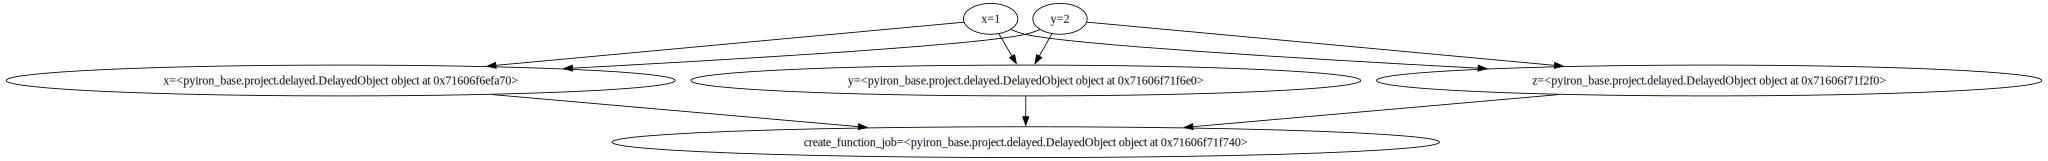

In [16]:
delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [17]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 1
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 2


6